# ***I. Import Environnement & DATA:***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***1. Read & examine the DATA***

In [ ]:
train_invoice = pd.read_csv('invoice_train.csv')
train_client = pd.read_csv('client_train.csv')  
test_invoice = pd.read_csv('invoice_test.csv')
test_client = pd.read_csv('client_test.csv')
sub_sample = pd.read_csv('SampleSubmission.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# ***II. Getting Insights from DATA (EDA):***

In [ ]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
train_invoice.tail()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC


In [ ]:
train_invoice.shape

(4476749, 16)

In [ ]:
train_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [ ]:
train_invoice.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [ ]:
train_invoice.columns.values 

array(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3',
       'consommation_level_4', 'old_index', 'new_index', 'months_number',
       'counter_type'], dtype=object)

In [ ]:
train_invoice.consommation_level_1.value_counts()

0        467553
800      247953
200      151245
1200     139628
300       40313
          ...  
5092          1
9186          1
7563          1
13283         1
5437          1
Name: consommation_level_1, Length: 8295, dtype: int64

In [ ]:
# old_index, new_index, counter_coefficient, consommation_level_4, ..
train_invoice.consommation_level_1.unique()

array([   82,  1200,   123, ..., 43053,  4824,  8314])

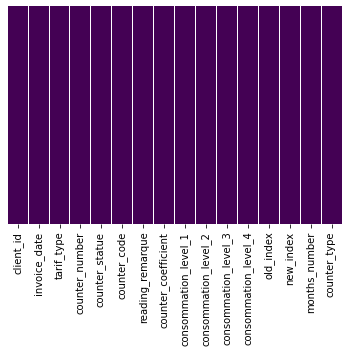

In [ ]:
sns.heatmap(train_invoice.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

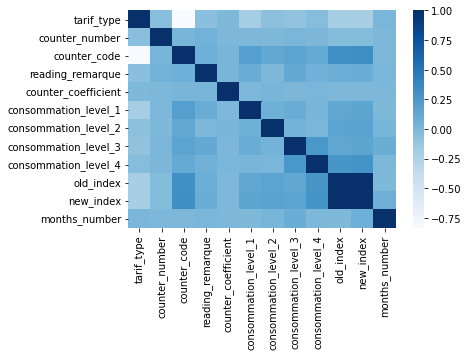

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(train_invoice.corr(),cmap='Blues',annot=False) 

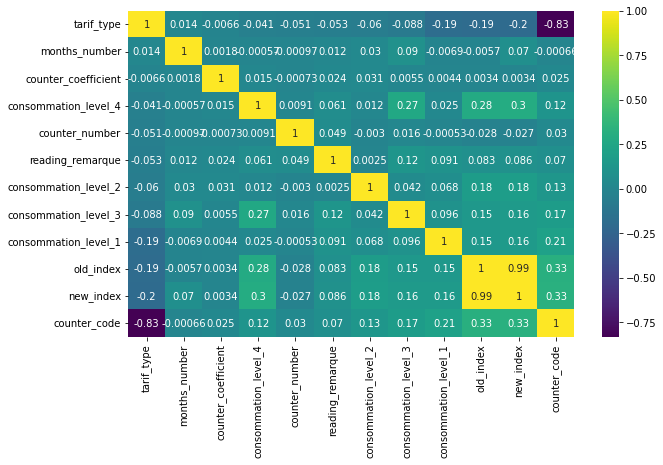

In [ ]:
k = 12 #number of variables for heatmap
cols = train_invoice.corr().nlargest(k, 'tarif_type')['tarif_type'].index
cm = train_invoice[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
tarif_type,1.000000,-0.050585,-0.833180,-0.053135,-0.006556,-0.185588,-0.060301,-0.087614,-0.040977,-0.194378,-0.196333,0.014203
counter_number,-0.050585,1.000000,0.030406,0.048613,-0.000732,-0.000534,-0.003040,0.015874,0.009142,-0.027722,-0.027146,-0.000966
counter_code,-0.833180,0.030406,1.000000,0.070061,0.025231,0.210089,0.128766,0.171057,0.116415,0.326529,0.330873,-0.000656
reading_remarque,-0.053135,0.048613,0.070061,1.000000,0.023982,0.090858,0.002535,0.121644,0.061261,0.082947,0.085901,0.012496
counter_coefficient,-0.006556,-0.000732,0.025231,0.023982,1.000000,0.004384,0.030878,0.005495,0.015489,0.003380,0.003369,0.001822
consommation_level_1,-0.185588,-0.000534,0.210089,0.090858,0.004384,1.000000,0.067766,0.095538,0.024835,0.147225,0.156672,-0.006861
consommation_level_2,-0.060301,-0.003040,0.128766,0.002535,0.030878,0.067766,1.000000,0.041917,0.012475,0.175242,0.183359,0.029610
consommation_level_3,-0.087614,0.015874,0.171057,0.121644,0.005495,0.095538,0.041917,1.000000,0.269509,0.147392,0.161778,0.090125
consommation_level_4,-0.040977,0.009142,0.116415,0.061261,0.015489,0.024835,0.012475,0.269509,1.000000,0.279352,0.296627,-0.000571
old_index,-0.194378,-0.027722,0.326529,0.082947,0.003380,0.147225,0.175242,0.147392,0.279352,1.000000,0.993678,-0.005734


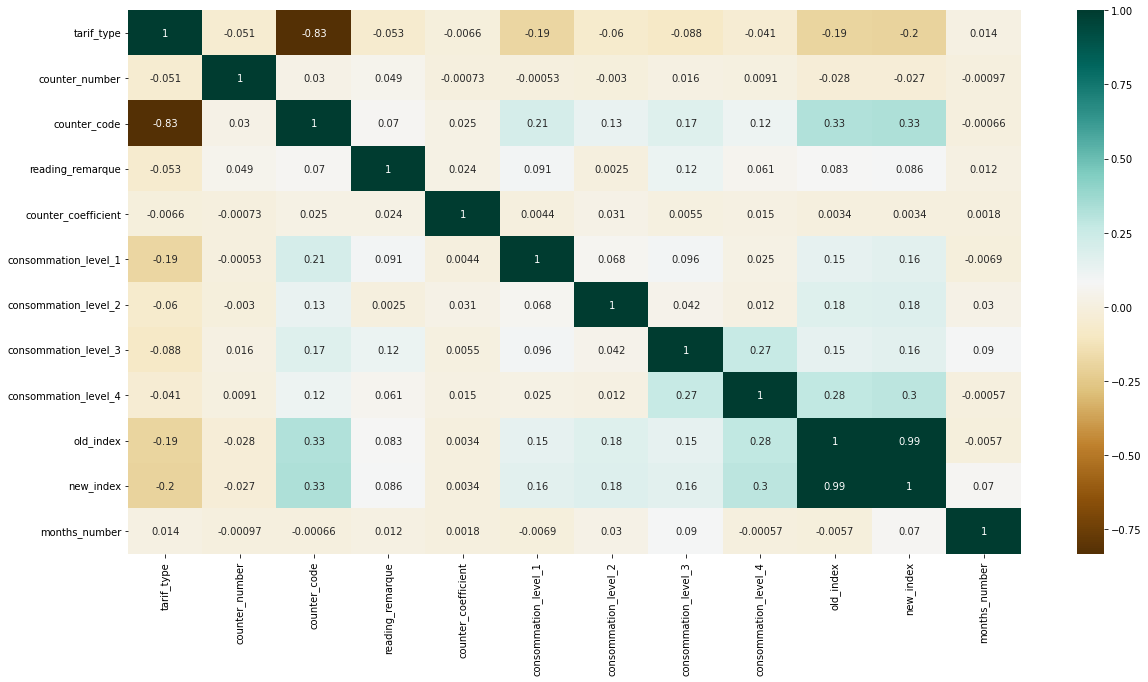

In [ ]:
plt.figure(figsize=(20,10))
c= train_invoice.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


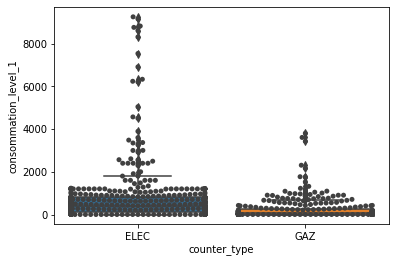

In [ ]:
train_invoice_part=test_invoice.iloc[:1000,:]
ax = sns.boxplot(x="counter_type", y="consommation_level_1", data=train_invoice_part)
ax = sns.swarmplot(x="counter_type", y="consommation_level_1", data=train_invoice_part, color=".25")

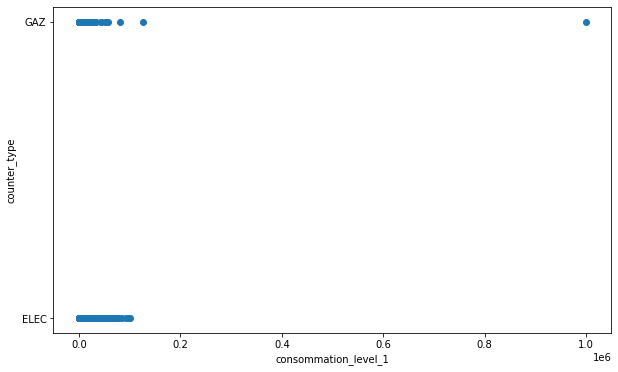

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_invoice['consommation_level_1'], train_invoice['counter_type'])
ax.set_xlabel('consommation_level_1')
ax.set_ylabel('counter_type')
plt.show()

# ***III. Preparing the DATA:***

In [ ]:
train_merged=pd.merge(train_invoice, train_client, on='client_id')

In [ ]:
train_merged['diff_index'] = train_merged['new_index'] - train_merged['old_index'] 
train_merged_new=train_merged.drop(labels=['client_id','invoice_date','counter_number','counter_type','old_index','new_index','disrict','region','creation_date'], axis=1)
train_merged_new.head()

,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,target,diff_index
0,11,0,203,8,1,82,0,0,0,4,11,0.0,82
1,11,0,203,6,1,1200,184,0,0,4,11,0.0,1384
2,11,0,203,8,1,123,0,0,0,4,11,0.0,123
3,11,0,207,8,1,102,0,0,0,4,11,0.0,102
4,11,0,207,9,1,572,0,0,0,12,11,0.0,572


In [ ]:
train_merged_new.counter_statue.value_counts()

0         4346960
1           73496
0           32048
5           20495
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [ ]:
train_merged_new.loc[train_merged_new["counter_statue"] == "0", "counter_statue"] = 0
train_merged_new.loc[train_merged_new["counter_statue"] == "4", "counter_statue"] = 4
train_merged_new.loc[train_merged_new["counter_statue"] == "5", "counter_statue"] = 5
train_merged_new.loc[train_merged_new["counter_statue"] == "1", "counter_statue"] = 1
s=[46,'A',618,769,269375,420]
for i in s:
  train_merged_new.drop(train_merged_new[train_merged_new['counter_statue'] == i].index, inplace = True)
train_merged_new.counter_statue.value_counts()

0    4379008
1      74036
5      20639
4       2729
3        258
2         32
Name: counter_statue, dtype: int64

In [ ]:
train_merged_new.counter_statue.unique()

array([0, 1, 5, 4, 3, 2], dtype=object)

***Down-sampling:***

In [ ]:
train_merged_new.target.value_counts()

0.0    4123590
1.0     353112
Name: target, dtype: int64

In [ ]:
tmn0_x=train_merged_new[(train_merged_new['target'] == 0)].index
tmn1_x=train_merged_new[(train_merged_new['target'] == 1)].index
len(tmn1_x)

353112

In [ ]:
#np.random.choice(tmn0, size=len(tmn1), replace=False)
rand_x = np.random.choice(tmn0_x, len(tmn1_x), replace=False)
rand_x = np.concatenate([tmn1_x,rand_x])
train = train_merged_new.loc[rand_x]

In [ ]:
#train.info()
train.target.value_counts()

1.0    353112
0.0    353112
Name: target, dtype: int64

In [ ]:
# Rows containing duplicate data
dup = train[train.duplicated()]
print("number of duplicate rows: ", dup.shape)

number of duplicate rows:  (521052, 13)


In [ ]:
# Used to count the number of rows before removing the data
train.count()

tarif_type              706224
counter_statue          706224
counter_code            706224
reading_remarque        706224
counter_coefficient     706224
consommation_level_1    706224
consommation_level_2    706224
consommation_level_3    706224
consommation_level_4    706224
months_number           706224
client_catg             706224
target                  706224
diff_index              706224
dtype: int64

In [ ]:
# Dropping the duplicates 
train1 = train.drop_duplicates()
train1.head()

,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,target,diff_index
1384,11,0,203,9,1,781,0,0,0,8,11,1.0,781
1385,11,0,203,9,1,382,0,0,0,4,11,1.0,382
1386,11,0,203,9,1,373,0,0,0,4,11,1.0,373
1387,11,0,203,9,1,328,0,0,0,4,11,1.0,328
1388,11,0,203,9,1,703,0,0,0,4,11,1.0,703


In [ ]:
# Counting the number of rows after removing duplicates.
train1.count()

tarif_type              185172
counter_statue          185172
counter_code            185172
reading_remarque        185172
counter_coefficient     185172
consommation_level_1    185172
consommation_level_2    185172
consommation_level_3    185172
consommation_level_4    185172
months_number           185172
client_catg             185172
target                  185172
diff_index              185172
dtype: int64

In [ ]:
# Finding the null values.
print(train1.isnull().sum())

tarif_type              0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
months_number           0
client_catg             0
target                  0
diff_index              0
dtype: int64


***Normalisation:***

In [ ]:
train1.tarif_type.value_counts()

11    128498
40     27330
10     16574
45      3952
15      2859
13      1631
14      1376
29      1283
9        846
12       792
21        21
30         4
18         4
8          2
Name: tarif_type, dtype: int64

In [ ]:
train1.head()

,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,target,diff_index
1384,11,0,203,9,1,781,0,0,0,8,11,1.0,781
1385,11,0,203,9,1,382,0,0,0,4,11,1.0,382
1386,11,0,203,9,1,373,0,0,0,4,11,1.0,373
1387,11,0,203,9,1,328,0,0,0,4,11,1.0,328
1388,11,0,203,9,1,703,0,0,0,4,11,1.0,703


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
train3 = scaler.fit_transform(train1)

In [ ]:
np.unique(train3[:,0])

array([0.        , 0.02702703, 0.05405405, 0.08108108, 0.10810811,
       0.13513514, 0.16216216, 0.18918919, 0.27027027, 0.35135135,
       0.56756757, 0.59459459, 0.86486486, 1.        ])

In [ ]:
train3

array([[0.08108108, 0.        , 0.33277311, ..., 0.        , 1.        ,
        0.692779  ],
       [0.08108108, 0.        , 0.33277311, ..., 0.        , 1.        ,
        0.69250024],
       [0.08108108, 0.        , 0.33277311, ..., 0.        , 1.        ,
        0.69249396],
       ...,
       [0.08108108, 0.        , 0.3394958 , ..., 0.        , 0.        ,
        0.6922669 ],
       [0.08108108, 0.        , 0.68571429, ..., 1.        , 0.        ,
        0.69238567],
       [1.        , 0.        , 0.03361345, ..., 1.        , 0.        ,
        0.69494753]])

In [ ]:
train_final=np.random.shuffle(train3)

In [ ]:
train_final

# ***IV. Taining the model:***

In [ ]:
print(train3.shape)
train_target = train3[:,11]
train_data = np.delete(train3, 11, 1)
print(train_target.shape)
print(train_data.shape)

(185172, 13)
(185172,)
(185172, 12)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_data, train_target)

***Test & Predict:***

In [ ]:
test_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [ ]:
test_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        int64 
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(13), object(3)
memory usage: 236.8+ MB


In [ ]:
test_merged=pd.merge(test_invoice, test_client, on='client_id')

In [ ]:
test_merged['diff_index'] = test_merged['new_index'] - test_merged['old_index'] 
test_data=test_merged.drop(labels=['invoice_date','counter_number','counter_type','old_index','new_index','disrict','region','creation_date'], axis=1)
test_data.head()

,client_id,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,diff_index
0,test_Client_0,11,0,203,8,1,755,0,0,0,8,11,755
1,test_Client_0,11,0,203,8,1,1067,0,0,0,8,11,1067
2,test_Client_0,11,0,203,8,1,0,0,0,0,4,11,0
3,test_Client_0,11,0,203,9,1,410,0,0,0,4,11,410
4,test_Client_0,11,0,203,9,1,412,0,0,0,4,11,412


In [ ]:
test_data.counter_statue.unique()

array([0, 1, 5, 4, 3, 2])

In [ ]:
test_data.shape

(1939730, 13)

In [ ]:
# Used to count the number of rows before removing the data
test_data.count()

client_id               1939730
tarif_type              1939730
counter_statue          1939730
counter_code            1939730
reading_remarque        1939730
counter_coefficient     1939730
consommation_level_1    1939730
consommation_level_2    1939730
consommation_level_3    1939730
consommation_level_4    1939730
months_number           1939730
client_catg             1939730
diff_index              1939730
dtype: int64

In [ ]:
# Dropping the duplicates 
test_data = test_data.drop_duplicates(subset=test_data.columns.difference(['client_id']))
test_data.head()

,client_id,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,diff_index
0,test_Client_0,11,0,203,8,1,755,0,0,0,8,11,755
1,test_Client_0,11,0,203,8,1,1067,0,0,0,8,11,1067
2,test_Client_0,11,0,203,8,1,0,0,0,0,4,11,0
3,test_Client_0,11,0,203,9,1,410,0,0,0,4,11,410
4,test_Client_0,11,0,203,9,1,412,0,0,0,4,11,412


In [ ]:
test_data.tail()

In [ ]:
# Counting the number of rows after removing duplicates.
test_data.count()

client_id               278068
tarif_type              278068
counter_statue          278068
counter_code            278068
reading_remarque        278068
counter_coefficient     278068
consommation_level_1    278068
consommation_level_2    278068
consommation_level_3    278068
consommation_level_4    278068
months_number           278068
client_catg             278068
diff_index              278068
dtype: int64

In [ ]:
# Finding the null values.
print(test_data.isnull().sum())

client_id               0
tarif_type              0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
months_number           0
client_catg             0
diff_index              0
dtype: int64


In [ ]:
client_id=test_data.iloc[:,0]
client_id

0             test_Client_0
1             test_Client_0
2             test_Client_0
3             test_Client_0
4             test_Client_0
                 ...       
1939548    test_Client_9993
1939633    test_Client_9996
1939637    test_Client_9997
1939678    test_Client_9997
1939705    test_Client_9999
Name: client_id, Length: 278068, dtype: object

In [ ]:
test_data=test_data.drop(labels=['client_id'], axis=1)

In [ ]:
test_data

,tarif_type,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,diff_index
0,11,0,203,8,1,755,0,0,0,8,11,755
1,11,0,203,8,1,1067,0,0,0,8,11,1067
2,11,0,203,8,1,0,0,0,0,4,11,0
3,11,0,203,9,1,410,0,0,0,4,11,410
4,11,0,203,9,1,412,0,0,0,4,11,412
...,...,...,...,...,...,...,...,...,...,...,...,...
1939548,11,0,203,8,1,1566,0,0,0,12,11,1566
1939633,40,5,5,8,1,60,0,0,0,2,11,60
1939637,10,0,202,9,1,100,174,0,0,2,11,274
1939678,10,0,202,8,1,128,0,0,0,6,11,128


In [ ]:
scaler_ts = MinMaxScaler() 
test_data = scaler_ts.fit_transform(test_data)

In [ ]:
np.unique(test_data[:,0])

array([0.        , 0.02702703, 0.05405405, 0.08108108, 0.10810811,
       0.13513514, 0.16216216, 0.18918919, 0.35135135, 0.43243243,
       0.51351351, 0.56756757, 0.59459459, 0.86486486, 0.91891892,
       1.        ])

In [ ]:
test_data.shape

(278068, 12)

In [ ]:
sub=clf.predict(test_data)

In [ ]:
sub

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
sub_prob=clf.predict_proba(test_data)[:,1]
sub_prob

array([0.44758043, 0.44897447, 0.44421052, ..., 0.45091129, 0.44426871,
       0.45120568])

In [ ]:
#clf.score(X, y)
sub.shape

(278068,)

In [ ]:
sub[50:150]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
sub_prob[50:70]

array([0.43662739, 0.44511932, 0.47765016, 0.43052374, 0.45771654,
       0.44940633, 0.42508583, 0.45435663, 0.47794223, 0.45435232,
       0.45700501, 0.45436228, 0.45435608, 0.47887539, 0.43548342,
       0.43479959, 0.47034776, 0.45435836, 0.45696467, 0.45435796])

In [ ]:
sub_doc = pd.DataFrame({'client_id': client_id,
                   'target': sub_prob})
sub_doc

,client_id,target
0,test_Client_0,0.447580
1,test_Client_0,0.448974
2,test_Client_0,0.444211
3,test_Client_0,0.452799
4,test_Client_0,0.452808
...,...,...
1939548,test_Client_9993,0.451206
1939633,test_Client_9996,0.543465
1939637,test_Client_9997,0.450911
1939678,test_Client_9997,0.444269


In [ ]:

sub_doc = sub_doc.groupby(['client_id']).mean().reset_index()

In [ ]:
sub_doc

,client_id,target
0,test_Client_0,0.438141
1,test_Client_1,0.441735
2,test_Client_10,0.454984
3,test_Client_100,0.448458
4,test_Client_1000,0.458020
...,...,...
40760,test_Client_9992,0.443743
40761,test_Client_9993,0.451206
40762,test_Client_9996,0.543465
40763,test_Client_9997,0.447590


In [ ]:
#insert sub & clien_id arrays into a submission file
#np.savetxt('submission_Amine-Roz-Marwa-Intissar.csv', sub_doc, delimiter=',')
sub_doc.to_csv(path_or_buf='/content/drive/MyDrive/ML Academy/project1/submission_Amine-Roz-Marwa-Intissar.csv',index=False)